<a href="https://colab.research.google.com/github/fatemakotha/1800-Data-Visualization/blob/main/Lab_6/Lab_06_Exploration_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Exploration A**
The company who supplied the Products data in the lecture notes also want an investigation into their website. As
well as the data explored over the last few weeks (https://tinyurl.com/ChrisCoDV/Pages/DailyHits.csv), there are a
also a number of other data files in the same folder. All of these files show data averaged or totalled over the year
under investigation:

• https://tinyurl.com/ChrisCoDV/Pages/PageExitRate.csv shows, as a percentage, the average exit rate. For each
page, this is the percentage of visitors who leave the site from that page (e.g. by clicking an external link or
closing the browser tab).

• https://tinyurl.com/ChrisCoDV/Pages/PageRevenue.csv shows the total revenue raised by serving adverts
from each page.

• https://tinyurl.com/ChrisCoDV/Pages/PageSize.csv shows, in Kilobytes, the size of the html content for each
page.

• https://tinyurl.com/ChrisCoDV/Pages/PageSpeed.csv shows the average time, in seconds, it takes for users to
download each page.

• https://tinyurl.com/ChrisCoDV/Pages/PageViewingTime.csv shows the average time, in seconds, that users
spend looking at each page.

#**1. First read all the data in and compile a summary data frame, similar to the lecture examples.**

In [ ]:
 import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/DailyHits.csv', index_col=0)
print(data.head())

page_revenue = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/PageRevenue.csv', index_col=0)
page_size = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/PageSize.csv', index_col=0)
page_speed = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/PageSpeed.csv', index_col=0)
page_viewing_time = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/PageViewingTime.csv', index_col=0)
page_exit_rate = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/PageExitRate.csv', index_col=0)

summary_data = pd.DataFrame(index=data.columns)
summary_data['Size'] = page_size.values
summary_data['Hits'] = data.sum().values
summary_data['Revenue'] = page_revenue.values
summary_data['Viewing'] = page_viewing_time.values
summary_data['Download'] = page_speed.values
summary_data['Exit'] = page_exit_rate.values
summary_data.head()


             001  002  003  004  005  006  007  008  009  010  ...  158  159  \
Date                                                           ...             
2019-01-01  1062   33   67   42    0    4    0    0    1   69  ...    0    0   
2019-01-02   976   41   72   19    2    0    0   14    1   62  ...    5    0   
2019-01-03   956   27   71   28    4    6   11    0    0   64  ...    0    0   
2019-01-04   976   30   57   29    0    0    3    0    2   52  ...    0    2   
2019-01-05   956   45   65   27    4    1    0    0    0   55  ...   12    0   

            160  161  162  163  164  165  166  167  
Date                                                
2019-01-01    4    0   10    2    2    2    0    0  
2019-01-02    0    7    0    0    0    0    1    3  
2019-01-03    0    0    6    0    0    3    0    0  
2019-01-04    0    0    0    0    0    0    0    7  
2019-01-05    0    4    0    0    0    0    5    2  

[5 rows x 167 columns]


,Size,Hits,Revenue,Viewing,Download,Exit
001,106.153936,379682,1972.142118,175.438381,7.601041,24.759071
002,79.352399,17401,101.836934,75.474441,7.079163,18.458663
003,48.208457,27249,196.146652,10.027850,4.714836,47.518158
004,105.709602,11668,102.653630,117.802372,13.995231,32.354706
005,43.593542,533,3.060067,12.522355,5.622858,45.828504


#**2. Create an initial visualisation showing bar chart subplots for all 6 metrics (i.e. those from the 5 files plus the total hits). Comment briefly on any likely correlations.**

Size
Hits
Revenue
Viewing
Download
Exit


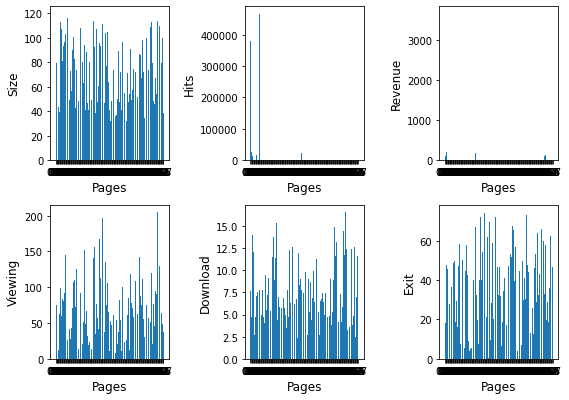

In [ ]:
plt.figure(figsize=(8, 8))
counter = 1
x_pos = np.arange(len(summary_data.index))
for attribute in summary_data:
    print(attribute)
    sub = plt.subplot(3, 3, counter)
    sub.bar(x_pos, summary_data[attribute], align='center')
    sub.set_xticks([])
    sub.set_xticks(x_pos)
    sub.set_xticklabels(summary_data.index)
    sub.set_xlabel('Pages', fontsize=12)
    sub.set_ylabel(attribute, fontsize=12)
    counter += 1
plt.tight_layout()
plt.show()

In [ ]:
#We cannot see any correlations exactly

#**3. Create a visualisation showing radar subplots for high volume pages. You should decide what order the 6 metrics appear around the each plot (using the guidelines in the lecture and noting that the company regards viewing time as a neutral indicator – it is good that users spend a lot of time on each page but it may mean that they can't find what they are looking for). Comment on the order you have chosen.**

         Size      Hits   Revenue   Viewing  Download      Exit
001  0.885814  0.812809  0.537839  0.856381  0.459396  0.332090
002  0.662165  0.037251  0.027773  0.368419  0.427855  0.247583
003  0.402281  0.058334  0.053493  0.048950  0.284958  0.637354
004  0.882106  0.024978  0.027996  0.575038  0.845852  0.433969
005  0.363771  0.001141  0.000835  0.061126  0.339838  0.614691


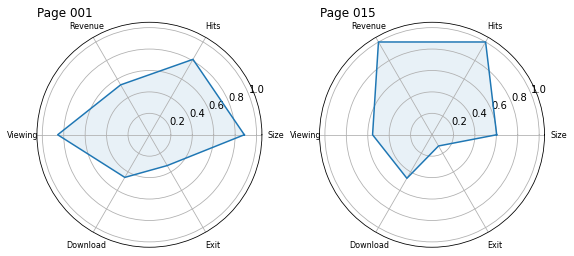

In [ ]:
normalised_data = summary_data / summary_data.max()
print(normalised_data.head())

selected = ['001', '015']

n_attributes = len(normalised_data.columns)
angles = [n / float(n_attributes) * 2 * np.pi for n in range(n_attributes + 1)]
plt.figure(figsize=(8, 8))
counter = 1
for name in selected:
    values = normalised_data.loc[[name]].values.flatten().tolist()
    values += values[:1]
    sub = plt.subplot(2, 2, counter, polar=True)
    sub.plot(angles, values)
    sub.fill(angles, values, alpha=0.1)
    sub.set_ylim(ymax=1.05)
    sub.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    sub.set_xticks(angles[0:-1])
    sub.set_xticklabels(normalised_data.columns, fontsize=8)
    sub.set_title('Page ' + name, fontsize=12, loc='left')
    counter += 1
plt.tight_layout()
plt.show()

In [ ]:
#The order is size, hits, revenue, veiweing, download
#The order was created when the summary_data was created

In [ ]:
#The reason of order is that the positive ones are fisrt, like size and revenue. Negative ones go last.

#**4. Now create a visualisation showing radar subplots for medium volume pages. What you will notice is that some of the metrics are too small to distinguish from each other. This is because (assuming you have adapted one of the lecture examples) some of the metrics are being normalised by very large values from the high volume pages.**

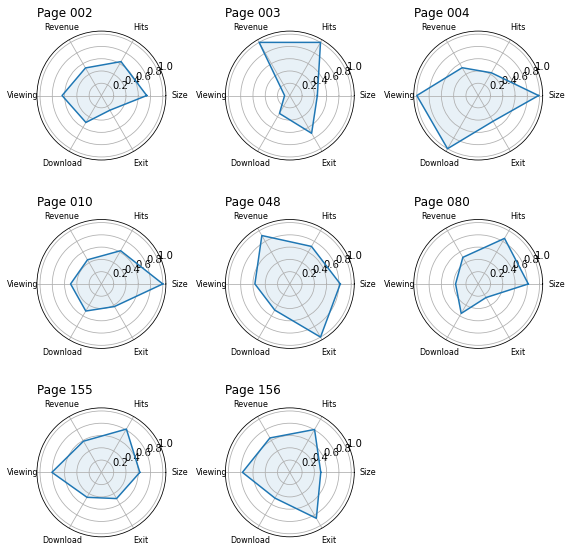

In [ ]:
selected = ['002', '003', '004', '010', '048','080', '155', '156']

#Hard to distinguish. That because we are comparing them with high vol pages as we normalised them using high vol pages
#It makes more sense to normalise using just the medium vol pages
normalised_data = summary_data / summary_data.loc[selected].max()

n_attributes = len(normalised_data.columns)
angles = [n / float(n_attributes) * 2 * np.pi for n in range(n_attributes + 1)]
plt.figure(figsize=(8, 8))
counter = 1
for name in selected:
    values = normalised_data.loc[[name]].values.flatten().tolist()
    values += values[:1]
    sub = plt.subplot(3, 3, counter, polar=True) #8 of the plots will not fit in (2,2) so we use (3,3)
    sub.plot(angles, values)
    sub.fill(angles, values, alpha=0.1)
    sub.set_ylim(ymax=1.05)
    sub.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    sub.set_xticks(angles[0:-1])
    sub.set_xticklabels(normalised_data.columns, fontsize=8)
    sub.set_title('Page ' + name, fontsize=12, loc='left')
    counter += 1
plt.tight_layout()
plt.show()

In [ ]:
#Page 003 has highest Viewing abd Revenue
# Page 048, 155 and 156 come next

#**5. Next create a correlogram / pair-plot of all 6 metrics. Comment on the obvious correlations.**

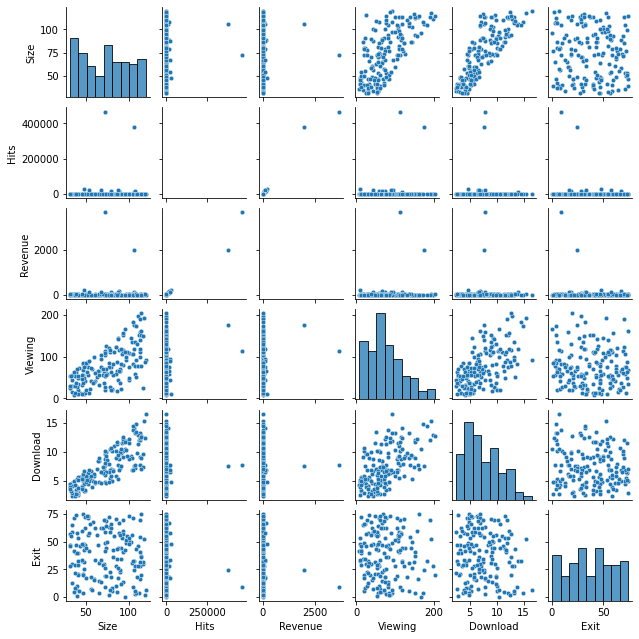

In [ ]:
import seaborn as sns
sns.pairplot(summary_data, height=1.5, plot_kws={'s': 20})
plt.show()

In [ ]:
#Size of the page affects the download time
#The size the bigger the viewing time is more
#Strong correlatio between Viewing and Download time

#**6. Unfortunately the correlogram is a bit unclear for some subplots because again the total hits for the high volume pages are so much larger than the other pages. To explore the correlations further, create a heatmap of correlations between the 6 metrics, similar to those generated for lecture 04. Comment on the correlations that you identify.**

In [ ]:
#Heat map using summary(not all / selected)

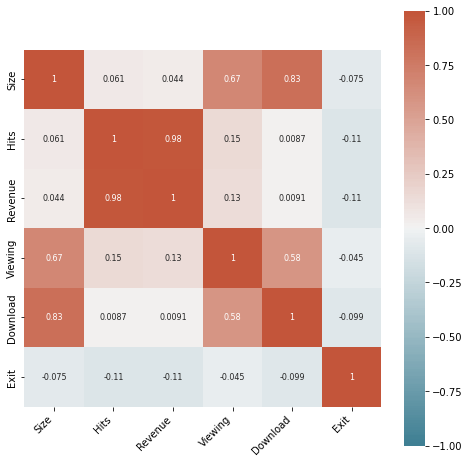

In [ ]:
plt.figure(figsize=(8, 8))
corr = summary_data.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200), square=True, annot=True,
                 annot_kws={"size": 8})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right') #rotated by 45 degrees
ax.set_yticklabels(ax.get_yticklabels(), rotation=45, horizontalalignment='right') #rotated by 45 degrees
plt.show()

In [ ]:
#Hits against Revenue has high correlation
#Then Download and np.size

#**7. Finally the company is interested in how the viewing time varies across medium volume pages as compared with page hits and revenue. Generate a bubble plot of hits against revenue with viewing time determining the bubble sizes. In order to do this you will need to restrict the summary data to just medium volume pages. The easy way to do this is:**

**summary_data = summary_data.loc[selected]**
#**where "selected" contains the list of medium volume pages. Given that you might expect that the page with the highest revenue might have the longest viewing time and / or the most hits, what feature (in terms of the combination of page hits, revenue and viewing time) stands out for this plot?**

NameError: ignored

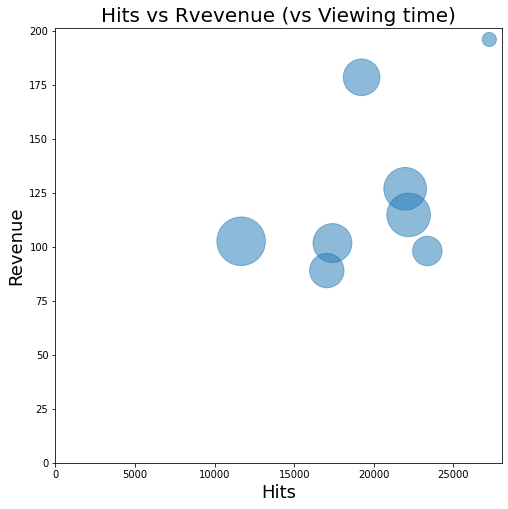

In [ ]:
#In order to do this you will need to restrict the summary data to just medium volume pages. The easy way to do this is:
# summary_data = summary_data.loc[selected]
selected = ['002', '003', '004', '010', '048','080', '155', '156']
summary_data = summary_data.loc[selected]

summary_data['BubbleSize'] = summary_data['Viewing'] * 20 #the 20 here can be altered to minimise the overlapping

plt.figure(figsize=(8, 8))
plt.scatter(summary_data['Hits'], summary_data['Revenue'], s=summary_data['BubbleSize'], alpha=0.5)
plt.xticks([0, 5000, 10000, 15000, 20000, 25000])
plt.yticks([0, 25, 50, 75, 100, 125, 150, 175, 200])
plt.title('Hits vs Rvevenue (vs Viewing time)', fontsize=20)
plt.xlabel('Hits', fontsize=18)
plt.ylabel('Revenue', fontsize=18)

#This bit of code is for label inside the bubble. The name is the page number i.e. 001
for i, name in enumerate(summary_data.index):
    plt.annotate(f"{name} ({summary_data['Viewing'][i]:.1f}s)", (summary_data['Hits'][i], summary['Revenue'][i]))
# plt.plot([0, 50], [0, 50], linestyle=':', color='r', label='price = cost (zero profit)')
plt.legend(loc=2)
plt.show()